### Imports

In [2]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

### Load TD-IDF Data

In [3]:
tfidf = pd.read_csv("../results/tfidf.csv")

ngrams = tfidf["ngram"]
tfidf_numeric = tfidf.drop(columns=["ngram"])

### Cosine Similarity

###### Cosine similarity measures the **angle** between two vectors in a multi-dimensional space. It evaluates how **similar the direction** of two vectors is, regardless of their magnitude.

###### **Value range:** -1 to 1  
###### Treats each language as a vector of TF-IDF values for all n-grams.  
###### Cosine similarity tells us **how closely the n-gram distributions of two languages align**.


In [35]:
# cosine similarity expects documents as rows, but in our case, 
# languages are columns, so we need to transpose:
tfidf_matrix = tfidf_numeric.T

# compute cosine similarity between languages
similarity_matrix = pd.DataFrame(
    cosine_similarity(tfidf_matrix),
    index=tfidf_matrix.index,
    columns=tfidf_matrix.index
)

similarity_matrix.to_csv("../results/similarity_matrix.csv")

In [36]:
similarity_matrix

,adasen,bikolano,cebuano,chavacano,english,ilokano,ilonggo,kinaray-a,masbatenyo,paranan,romblomanon,spanish,tagalog,tausug,waray,yami
adasen,1.000000,0.145814,0.147243,0.045746,0.016427,0.419796,0.146098,0.111129,0.145807,0.171375,0.192474,0.038054,0.153688,0.203131,0.182585,0.069271
bikolano,0.145814,1.000000,0.753349,0.041664,0.003752,0.127200,0.793153,0.679751,0.804058,0.105508,0.721143,0.029947,0.732077,0.194173,0.698503,0.069640
cebuano,0.147243,0.753349,1.000000,0.027415,0.003587,0.111428,0.799639,0.651385,0.761824,0.087191,0.723351,0.015728,0.674892,0.190569,0.722275,0.060818
chavacano,0.045746,0.041664,0.027415,1.000000,0.032185,0.031226,0.035348,0.027443,0.036492,0.029217,0.036407,0.693646,0.170772,0.038771,0.024425,0.036937
english,0.016427,0.003752,0.003587,0.032185,1.000000,0.007380,0.003090,0.002792,0.003443,0.005660,0.031503,0.033181,0.003209,0.004345,0.005225,0.011251
ilokano,0.419796,0.127200,0.111428,0.031226,0.007380,1.000000,0.120525,0.130885,0.111621,0.147037,0.112642,0.030338,0.115974,0.090935,0.108529,0.094672
ilonggo,0.146098,0.793153,0.799639,0.035348,0.003090,0.120525,1.000000,0.803610,0.860863,0.084347,0.826289,0.021884,0.724626,0.137095,0.802689,0.062146
kinaray-a,0.111129,0.679751,0.651385,0.027443,0.002792,0.130885,0.803610,1.000000,0.690494,0.076788,0.680005,0.016169,0.630873,0.107514,0.653301,0.074043
masbatenyo,0.145807,0.804058,0.761824,0.036492,0.003443,0.111621,0.860863,0.690494,1.000000,0.194503,0.776765,0.056027,0.688462,0.220600,0.739690,0.062992
paranan,0.171375,0.105508,0.087191,0.029217,0.005660,0.147037,0.084347,0.076788,0.194503,1.000000,0.094861,0.119242,0.101294,0.248184,0.086418,0.062437


### Visualization/s

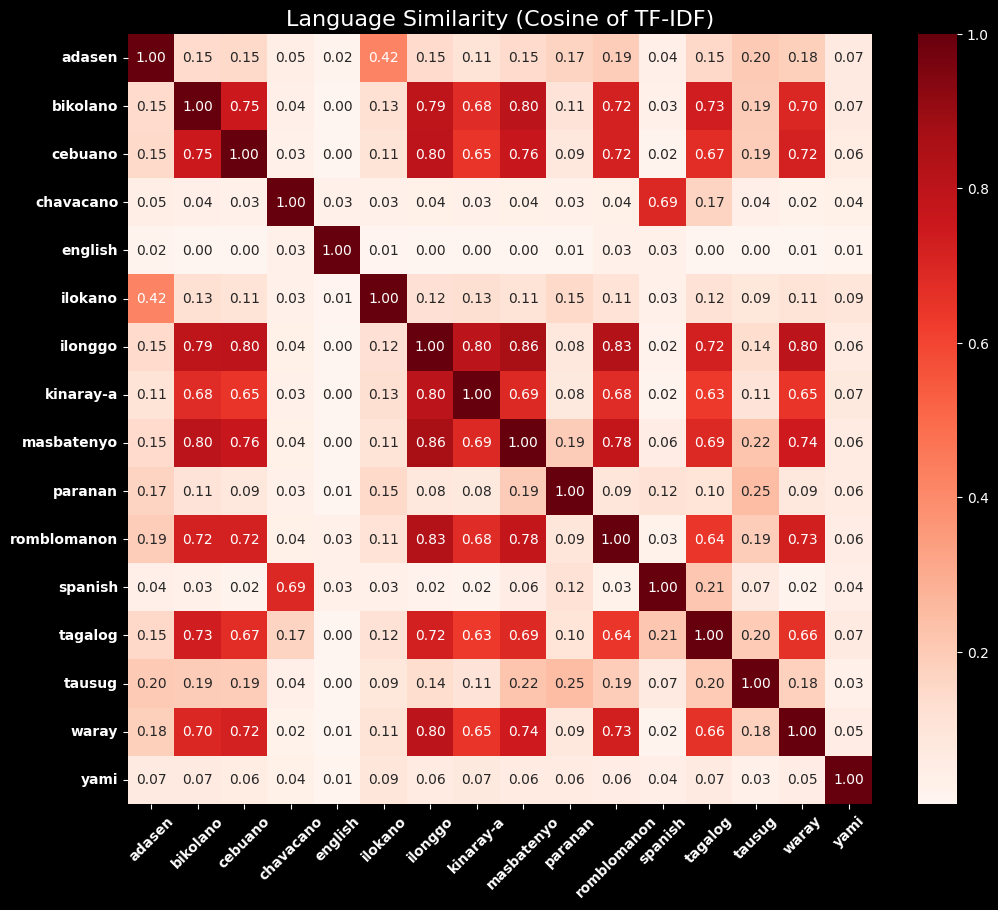

In [37]:
plt.style.use("dark_background")

plt.figure(figsize=(12, 10))
sns.heatmap(
    similarity_matrix,
    annot=True,
    fmt=".2f",
    cmap="Reds",  
    cbar=True,
    linewidths=0,  
)

plt.title("Language Similarity (Cosine of TF-IDF)", color="white", fontsize=16)

plt.xticks(fontsize=10, fontweight="semibold", color="white", rotation=45)  
plt.yticks(fontsize=10, fontweight="semibold", color="white")

plt.savefig("../results/similarity_matrix.png", dpi=500, bbox_inches="tight")
plt.show()